# HyperParameters- Predicting Red Hat Business Value

Our goal is to find the best set of hyperparameters for any alogorithm for the kaggle datset for prediction of red hat business value for classification model.

Red Hat is able to gather a great deal of information over time about the behavior of individuals who interact with them. They’re in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them. In this competition, Kagglers are challenged to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities. With an improved prediction model in place, Red Hat will be able to more efficiently prioritize resources to generate more business and better serve their customers.

•	Goals and Objective:
1.	To create a prediction model with the best possible accuracy by finding the best possible hyperparameters.
2.	We will try to find these best values for hyperparameters using H2O.
3.	End goal is to create a database using all the algorithm and the best set of hyperparameters respectively for multiple datasets.

For this Particular dataset we can  see that Distribution Random Forest performed the best with an AUC of 0.9988 value.


## Acknowledgements

Source:These data sets are taken from kaggle.com. The website link is https://www.kaggle.com/c/predicting-red-hat-business-value

# What are hyperparameters?
Nearly all model algorithms used in machine learning have a set of tuning “knobs” which affect how the learning algorithm fits the model to the data. Examples are the regularization settings alpha and lambda for Generalized Linear Modeling or ntrees and max_depth for Gradient Boosted Models

###### The set of all combinations of values for these knobs is called the hyperparameter space. We’d like to find a set of hyperparameter values which gives us the best model for our data in a reasonable amount of time. This process is called hyperparameter optimization.


In [308]:

%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm.libsvm import cross_validation
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
from sklearn import metrics
import sklearn
import math
from math import sqrt
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split 
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
import json

import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from IPython.display import Image

In [2]:
pd.set_option('display.max_columns', None)

Reading the CSV files provided in the Kaggle compeition like act_train, act_test and act_people

In [3]:

train=pd.read_csv("act_train.csv")    
people =pd.read_csv("people.csv")
test =pd.read_csv("act_test.csv")

# Data pre-processing

We perform data preprocessing to convert the raw data into a clean data set. In other words,the data is gathered from different sources it is collected in raw format which is not feasible for the analysis

To check the data in the train.csv dataset we fetched the top 5 rows of the dataset

In [4]:
train.head()

people_id   activity_id        date activity_category char_1 char_2 char_3  \
0   ppl_100  act2_1734928  2023-08-26            type 4    NaN    NaN    NaN   
1   ppl_100  act2_2434093  2022-09-27            type 2    NaN    NaN    NaN   
2   ppl_100  act2_3404049  2022-09-27            type 2    NaN    NaN    NaN   
3   ppl_100  act2_3651215  2023-08-04            type 2    NaN    NaN    NaN   
4   ppl_100  act2_4109017  2023-08-26            type 2    NaN    NaN    NaN   

  char_4 char_5 char_6 char_7 char_8 char_9  char_10  outcome  
0    NaN    NaN    NaN    NaN    NaN    NaN  type 76        0  
1    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
2    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
3    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
4    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0

We were able to see a lot NaN values in the train.csv dataset.Thus we tried to find out the total number of NaN values as per the columns.Below is the code for that:

In [5]:
train.isnull().sum()

people_id                  0
activity_id                0
date                       0
activity_category          0
char_1               2039676
char_2               2039676
char_3               2039676
char_4               2039676
char_5               2039676
char_6               2039676
char_7               2039676
char_8               2039676
char_9               2039676
char_10               157615
outcome                    0
dtype: int64

To get the sum of total number of NaN values for all the columns

In [6]:
train.isnull().sum().sum()

18514699

Similarly in people.csv dataset we found a lot of NaN values as shown below.So we tried to calculate the total number of NaN values using the below:

In [7]:
people.head()

people_id  char_1      group_1  char_2        date   char_3   char_4  \
0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   type 5   
1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   type 9   
2  ppl_100003  type 2  group 33592  type 3  2022-06-10   type 4   type 8   
3  ppl_100004  type 2  group 22593  type 3  2022-07-20  type 40  type 25   
4  ppl_100006  type 2   group 6534  type 3  2022-07-27  type 40  type 25   

   char_5  char_6   char_7  char_8  char_9  char_10  char_11  char_12  \
0  type 5  type 3  type 11  type 2  type 2     True    False    False   
1  type 5  type 3  type 11  type 2  type 4    False    False     True   
2  type 5  type 2   type 5  type 2  type 2     True     True     True   
3  type 9  type 4  type 16  type 2  type 2     True     True     True   
4  type 9  type 3   type 8  type 2  type 2    False    False    False   

   char_13  char_14  char_15  char_16  char_17  char_18  char_19  char_20  \
0     True     True    False     True    False    False    False    False   
1     True    False    False    False     True    False    False    False   
2     True     True     True    False     True    False     True    False   
3     True     True    False     True     True     True     True     True   
4    False    False    False    False    False    False    False    False   

   char_21  char_22  char_23  char_24  char_25  char_26  char_27  char_28  \
0     True    False    False    False    False    False     True     True   
1    False    False     True    False     True     True     True    False   
2     True     True     True     True     True     True     True     True   
3     True     True     True    False     True     True     True     True   
4    False    False    False    False    False    False    False    False   

   char_29  char_30  char_31  char_32  char_33  char_34  char_35  char_36  \
0    False     True     True    False    False     True     True     True   
1    False     True     True     True     True     True     True     True   
2    False    False     True     True     True     True    False     True   
3     True     True     True     True     True     True     True     True   
4    False    False     True    False    False    False     True     True   

   char_37  char_38  
0    False       36  
1    False       76  
2     True       99  
3     True       76  
4    False       84

In [8]:
people.isnull().sum()

people_id    0
char_1       0
group_1      0
char_2       0
date         0
char_3       0
char_4       0
char_5       0
char_6       0
char_7       0
char_8       0
char_9       0
char_10      0
char_11      0
char_12      0
char_13      0
char_14      0
char_15      0
char_16      0
char_17      0
char_18      0
char_19      0
char_20      0
char_21      0
char_22      0
char_23      0
char_24      0
char_25      0
char_26      0
char_27      0
char_28      0
char_29      0
char_30      0
char_31      0
char_32      0
char_33      0
char_34      0
char_35      0
char_36      0
char_37      0
char_38      0
dtype: int64

In [9]:
people.isnull().sum().sum()

0

To Convert the Categorical data in people.csv for fields containing the 'type'+int format to int values,to reamove all the Nan Values and replace the Nan values by 'type 0' we use the below code:

In [10]:
for i in list(people.columns):
    if i not in ['people_id', 'activity_id', 'date', 'char_38', 'outcome']:
        if people[i].dtype == 'object':
            people[i].fillna('type 0', inplace=True)
            people[i] = people[i].map(lambda x: x.split(' ')[1]).astype(np.int32)
        elif people[i].dtype == 'bool' :
            people[i] = people[i].astype(np.int8)

To Convert the Categorical data in train.csv for fields containing the 'type'+int format to int values,to reamove all the Nan Values and replace the Nan values by 'type 0' we use the below code:

In [11]:
for i in list(train.columns):
    if i not in ['people_id', 'activity_id', 'date','outcome']:
        if train[i].dtype == 'object':
            train[i].fillna('type 0', inplace=True)
            train[i] = train[i].map(lambda x: x.split(' ')[1]).astype(np.int32)
        elif train[i].dtype == 'bool' :
            train[i] = train[i].astype(np.int8)

To Convert the Categorical data in test.csv for fields containing the 'type'+int format to int values,to reamove all the Nan Values and replace the Nan values by 'type 0' we use the below code:

In [12]:
for i in list(test.columns):
    if i not in ['people_id', 'activity_id', 'date','outcome']:
        if test[i].dtype == 'object':
            test[i].fillna('type 0', inplace=True)
            test[i] = test[i].map(lambda x: x.split(' ')[1]).astype(np.int32)
        elif test[i].dtype == 'bool' :
            test[i] = test[i].astype(np.int8)

As all the datasets used above have the date columns containing the values in aphanumeric format we need to convert them to 3 different columns containing date, month and year, we have created a function to perform this conversion named convDate.

 
Args: Datasets are passed for changing the date column to date, month and year
<br>Modifies: ate columns containing the values in aphanumeric format we need to convert them to 3 different columns containing date, month and year.
<br>Returns: Returns a dataset with 3 different columns date, month and year.

In [13]:
def convDate(data):
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['isweekend'] = (data['date'].dt.weekday >= 5).astype(int)
    data = data.drop('date', axis = 1)

    return data

To Check if the above performed data preprocessing steps have worked properly or not we are using the below code: 

In [14]:
train.head()

people_id   activity_id        date  activity_category  char_1  char_2  \
0   ppl_100  act2_1734928  2023-08-26                  4       0       0   
1   ppl_100  act2_2434093  2022-09-27                  2       0       0   
2   ppl_100  act2_3404049  2022-09-27                  2       0       0   
3   ppl_100  act2_3651215  2023-08-04                  2       0       0   
4   ppl_100  act2_4109017  2023-08-26                  2       0       0   

   char_3  char_4  char_5  char_6  char_7  char_8  char_9  char_10  outcome  
0       0       0       0       0       0       0       0       76        0  
1       0       0       0       0       0       0       0        1        0  
2       0       0       0       0       0       0       0        1        0  
3       0       0       0       0       0       0       0        1        0  
4       0       0       0       0       0       0       0        1        0

To Ensure that No NaN or Null Values are left in the dataset train.csv.

In [15]:
train.isnull().sum()

people_id            0
activity_id          0
date                 0
activity_category    0
char_1               0
char_2               0
char_3               0
char_4               0
char_5               0
char_6               0
char_7               0
char_8               0
char_9               0
char_10              0
outcome              0
dtype: int64

To Check if the above performed data preprocessing steps have worked properly or not we are using the below code: 

In [16]:
test.head()

people_id   activity_id        date  activity_category  char_1  char_2  \
0  ppl_100004   act1_249281  2022-07-20                  1       5      10   
1  ppl_100004   act2_230855  2022-07-20                  5       0       0   
2   ppl_10001   act1_240724  2022-10-14                  1      12       1   
3   ppl_10001    act1_83552  2022-11-27                  1      20      10   
4   ppl_10001  act2_1043301  2022-10-15                  5       0       0   

   char_3  char_4  char_5  char_6  char_7  char_8  char_9  char_10  
0       5       1       6       1       1       7       4        0  
1       0       0       0       0       0       0       0      682  
2       5       4       6       1       1      13      10        0  
3       5       4       6       1       1       5       5        0  
4       0       0       0       0       0       0       0     3015

In [17]:
people.isnull().sum()

people_id    0
char_1       0
group_1      0
char_2       0
date         0
char_3       0
char_4       0
char_5       0
char_6       0
char_7       0
char_8       0
char_9       0
char_10      0
char_11      0
char_12      0
char_13      0
char_14      0
char_15      0
char_16      0
char_17      0
char_18      0
char_19      0
char_20      0
char_21      0
char_22      0
char_23      0
char_24      0
char_25      0
char_26      0
char_27      0
char_28      0
char_29      0
char_30      0
char_31      0
char_32      0
char_33      0
char_34      0
char_35      0
char_36      0
char_37      0
char_38      0
dtype: int64

To Check if the above performed data preprocessing steps have worked properly or not we are using the below code: 

In [18]:
people.head()

people_id  char_1  group_1  char_2        date  char_3  char_4  char_5  \
0     ppl_100       2    17304       2  2021-06-29       5       5       5   
1  ppl_100002       2     8688       3  2021-01-06      28       9       5   
2  ppl_100003       2    33592       3  2022-06-10       4       8       5   
3  ppl_100004       2    22593       3  2022-07-20      40      25       9   
4  ppl_100006       2     6534       3  2022-07-27      40      25       9   

   char_6  char_7  char_8  char_9  char_10  char_11  char_12  char_13  \
0       3      11       2       2        1        0        0        1   
1       3      11       2       4        0        0        1        1   
2       2       5       2       2        1        1        1        1   
3       4      16       2       2        1        1        1        1   
4       3       8       2       2        0        0        0        0   

   char_14  char_15  char_16  char_17  char_18  char_19  char_20  char_21  \
0        1        0        1        0        0        0        0        1   
1        0        0        0        1        0        0        0        0   
2        1        1        0        1        0        1        0        1   
3        1        0        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   char_22  char_23  char_24  char_25  char_26  char_27  char_28  char_29  \
0        0        0        0        0        0        1        1        0   
1        0        1        0        1        1        1        0        0   
2        1        1        1        1        1        1        1        0   
3        1        1        0        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   char_30  char_31  char_32  char_33  char_34  char_35  char_36  char_37  \
0        1        1        0        0        1        1        1        0   
1        1        1        1        1        1        1        1        0   
2        0        1        1        1        1        0        1        1   
3        1        1        1        1        1        1        1        1   
4        0        1        0        0        0        1        1        0   

   char_38  
0       36  
1       76  
2       99  
3       76  
4       84

We are using the defined function convDate to convert the date from alphanumeric format to three columns for date, month and year contating integer values.

In [19]:
train = convDate(train)
test = convDate(test)
people = convDate(people)

We are just copying the people dataset to another dataset named people1 for future processing.

In [20]:
people1 = people.copy()

To make sure that the convDate function worked as expected the below line of code was run.

In [21]:
train.head()


people_id   activity_id  activity_category  char_1  char_2  char_3  char_4  \
0   ppl_100  act2_1734928                  4       0       0       0       0   
1   ppl_100  act2_2434093                  2       0       0       0       0   
2   ppl_100  act2_3404049                  2       0       0       0       0   
3   ppl_100  act2_3651215                  2       0       0       0       0   
4   ppl_100  act2_4109017                  2       0       0       0       0   

   char_5  char_6  char_7  char_8  char_9  char_10  outcome  year  month  day  \
0       0       0       0       0       0       76        0  2023      8   26   
1       0       0       0       0       0        1        0  2022      9   27   
2       0       0       0       0       0        1        0  2022      9   27   
3       0       0       0       0       0        1        0  2023      8    4   
4       0       0       0       0       0        1        0  2023      8   26   

   isweekend  
0          1  
1          0  
2          0  
3          0  
4          1

We defined a function pi to convert people_id to integer:
<br>Args:
Datasets are passed for changing people ID value from string to integer
 <br>Modifies:
Changes the values of people ID to Integer.example PPl_100 will be converted to 100.
 <br>Returns:
Returns a dataset with people ID as integer

In [22]:
def pi(pee):
    pee['people_id'] = pee['people_id'].apply(lambda x: x.split('_')[1])
    pee['people_id'] = pd.to_numeric(pee['people_id']).astype(int)
    return pee


We defined a function act to convert activity_id to integer:
<br>Args: Datasets are passed for changing activity_id value from string to integer 
<br>Modifies: Changes the values of activity_id to Integer.example Act_100 will be converted to 100. 
<br>Returns: Returns a dataset with people ID as integer

In [23]:
def act(activity):
    activity['activity_id'] = activity['activity_id'].apply(lambda x: x.split('_')[1])
    activity['activity_id'] = pd.to_numeric(activity['activity_id']).astype(int)
    return activity

Implementation of pi and act functions to train dataset

In [24]:
train = pi(train)

In [25]:
people.head()

people_id  char_1  group_1  char_2  char_3  char_4  char_5  char_6  \
0     ppl_100       2    17304       2       5       5       5       3   
1  ppl_100002       2     8688       3      28       9       5       3   
2  ppl_100003       2    33592       3       4       8       5       2   
3  ppl_100004       2    22593       3      40      25       9       4   
4  ppl_100006       2     6534       3      40      25       9       3   

   char_7  char_8  char_9  char_10  char_11  char_12  char_13  char_14  \
0      11       2       2        1        0        0        1        1   
1      11       2       4        0        0        1        1        0   
2       5       2       2        1        1        1        1        1   
3      16       2       2        1        1        1        1        1   
4       8       2       2        0        0        0        0        0   

   char_15  char_16  char_17  char_18  char_19  char_20  char_21  char_22  \
0        0        1        0        0        0        0        1        0   
1        0        0        1        0        0        0        0        0   
2        1        0        1        0        1        0        1        1   
3        0        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   char_23  char_24  char_25  char_26  char_27  char_28  char_29  char_30  \
0        0        0        0        0        1        1        0        1   
1        1        0        1        1        1        0        0        1   
2        1        1        1        1        1        1        0        0   
3        1        0        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   char_31  char_32  char_33  char_34  char_35  char_36  char_37  char_38  \
0        1        0        0        1        1        1        0       36   
1        1        1        1        1        1        1        0       76   
2        1        1        1        1        0        1        1       99   
3        1        1        1        1        1        1        1       76   
4        1        0        0        0        1        1        0       84   

   year  month  day  isweekend  
0  2021      6   29          0  
1  2021      1    6          0  
2  2022      6   10          0  
3  2022      7   20          0  
4  2022      7   27          0

Implementation of pi and act functions to people dataset

In [26]:
people = pi(people)

In [27]:
people.head()

people_id  char_1  group_1  char_2  char_3  char_4  char_5  char_6  char_7  \
0        100       2    17304       2       5       5       5       3      11   
1     100002       2     8688       3      28       9       5       3      11   
2     100003       2    33592       3       4       8       5       2       5   
3     100004       2    22593       3      40      25       9       4      16   
4     100006       2     6534       3      40      25       9       3       8   

   char_8  char_9  char_10  char_11  char_12  char_13  char_14  char_15  \
0       2       2        1        0        0        1        1        0   
1       2       4        0        0        1        1        0        0   
2       2       2        1        1        1        1        1        1   
3       2       2        1        1        1        1        1        0   
4       2       2        0        0        0        0        0        0   

   char_16  char_17  char_18  char_19  char_20  char_21  char_22  char_23  \
0        1        0        0        0        0        1        0        0   
1        0        1        0        0        0        0        0        1   
2        0        1        0        1        0        1        1        1   
3        1        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   char_24  char_25  char_26  char_27  char_28  char_29  char_30  char_31  \
0        0        0        0        1        1        0        1        1   
1        0        1        1        1        0        0        1        1   
2        1        1        1        1        1        0        0        1   
3        0        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        1   

   char_32  char_33  char_34  char_35  char_36  char_37  char_38  year  month  \
0        0        0        1        1        1        0       36  2021      6   
1        1        1        1        1        1        0       76  2021      1   
2        1        1        1        0        1        1       99  2022      6   
3        1        1        1        1        1        1       76  2022      7   
4        0        0        0        1        1        0       84  2022      7   

   day  isweekend  
0   29          0  
1    6          0  
2   10          0  
3   20          0  
4   27          0

In [28]:
train.isnull().sum()

people_id            0
activity_id          0
activity_category    0
char_1               0
char_2               0
char_3               0
char_4               0
char_5               0
char_6               0
char_7               0
char_8               0
char_9               0
char_10              0
outcome              0
year                 0
month                0
day                  0
isweekend            0
dtype: int64

In [29]:
people.isnull().sum()

people_id    0
char_1       0
group_1      0
char_2       0
char_3       0
char_4       0
char_5       0
char_6       0
char_7       0
char_8       0
char_9       0
char_10      0
char_11      0
char_12      0
char_13      0
char_14      0
char_15      0
char_16      0
char_17      0
char_18      0
char_19      0
char_20      0
char_21      0
char_22      0
char_23      0
char_24      0
char_25      0
char_26      0
char_27      0
char_28      0
char_29      0
char_30      0
char_31      0
char_32      0
char_33      0
char_34      0
char_35      0
char_36      0
char_37      0
char_38      0
year         0
month        0
day          0
isweekend    0
dtype: int64

In [30]:
test = pi(test)


In [31]:
test.head()

people_id   activity_id  activity_category  char_1  char_2  char_3  char_4  \
0     100004   act1_249281                  1       5      10       5       1   
1     100004   act2_230855                  5       0       0       0       0   
2      10001   act1_240724                  1      12       1       5       4   
3      10001    act1_83552                  1      20      10       5       4   
4      10001  act2_1043301                  5       0       0       0       0   

   char_5  char_6  char_7  char_8  char_9  char_10  year  month  day  \
0       6       1       1       7       4        0  2022      7   20   
1       0       0       0       0       0      682  2022      7   20   
2       6       1       1      13      10        0  2022     10   14   
3       6       1       1       5       5        0  2022     11   27   
4       0       0       0       0       0     3015  2022     10   15   

   isweekend  
0          0  
1          0  
2          0  
3          1  
4          1

To merge the datasets of people and train dataset, use the below line of code:

In [32]:
merge_ds=pd.merge(people,train, how='left', on=['people_id'])

To check the shape of the new created dataset 'merge_ds'

In [33]:
merge_ds.shape

(2235114, 61)

As the dataset contains some NaN values after merging we are using the below code to remove the null values:

In [34]:
merge_ds=merge_ds.dropna()

To make sure no null values are there in the dataset after using dropna:

merge_ds.isnull().sum()

We created a heatmap to know the relationship between all the features of the dataset merge_ds

plt.figure(figsize=(16,12))
sns.heatmap(data=merge_ds.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

We use the below line of code to merger the test and people dataset to give us a new dataset named merge_ts

In [35]:
merge_ts=pd.merge(people,test, how='left', on=['people_id'])

To check the data in the merge_ts dataset we use the below:

In [36]:
merge_ts.head()

people_id  char_1_x  group_1  char_2_x  char_3_x  char_4_x  char_5_x  \
0        100         2    17304         2         5         5         5   
1     100002         2     8688         3        28         9         5   
2     100003         2    33592         3         4         8         5   
3     100004         2    22593         3        40        25         9   
4     100004         2    22593         3        40        25         9   

   char_6_x  char_7_x  char_8_x  char_9_x  char_10_x  char_11  char_12  \
0         3        11         2         2          1        0        0   
1         3        11         2         4          0        0        1   
2         2         5         2         2          1        1        1   
3         4        16         2         2          1        1        1   
4         4        16         2         2          1        1        1   

   char_13  char_14  char_15  char_16  char_17  char_18  char_19  char_20  \
0        1        1        0        1        0        0        0        0   
1        1        0        0        0        1        0        0        0   
2        1        1        1        0        1        0        1        0   
3        1        1        0        1        1        1        1        1   
4        1        1        0        1        1        1        1        1   

   char_21  char_22  char_23  char_24  char_25  char_26  char_27  char_28  \
0        1        0        0        0        0        0        1        1   
1        0        0        1        0        1        1        1        0   
2        1        1        1        1        1        1        1        1   
3        1        1        1        0        1        1        1        1   
4        1        1        1        0        1        1        1        1   

   char_29  char_30  char_31  char_32  char_33  char_34  char_35  char_36  \
0        0        1        1        0        0        1        1        1   
1        0        1        1        1        1        1        1        1   
2        0        0        1        1        1        1        0        1   
3        1        1        1        1        1        1        1        1   
4        1        1        1        1        1        1        1        1   

   char_37  char_38  year_x  month_x  day_x  isweekend_x  activity_id  \
0        0       36    2021        6     29            0          NaN   
1        0       76    2021        1      6            0          NaN   
2        1       99    2022        6     10            0          NaN   
3        1       76    2022        7     20            0  act1_249281   
4        1       76    2022        7     20            0  act2_230855   

   activity_category  char_1_y  char_2_y  char_3_y  char_4_y  char_5_y  \
0                NaN       NaN       NaN       NaN       NaN       NaN   
1                NaN       NaN       NaN       NaN       NaN       NaN   
2                NaN       NaN       NaN       NaN       NaN       NaN   
3                1.0       5.0      10.0       5.0       1.0       6.0   
4                5.0       0.0       0.0       0.0       0.0       0.0   

   char_6_y  char_7_y  char_8_y  char_9_y  char_10_y  year_y  month_y  day_y  \
0       NaN       NaN       NaN       NaN        NaN     NaN      NaN    NaN   
1       NaN       NaN       NaN       NaN        NaN     NaN      NaN    NaN   
2       NaN       NaN       NaN       NaN        NaN     NaN      NaN    NaN   
3       1.0       1.0       7.0       4.0        0.0  2022.0      7.0   20.0   
4       0.0       0.0       0.0       0.0      682.0  2022.0      7.0   20.0   

   isweekend_y  
0          NaN  
1          NaN  
2          NaN  
3          0.0  
4          0.0

To drop the NaN values of the merge_ts dataset we use the below line of code:

In [37]:
merge_ts = merge_ts.dropna()

In [38]:
merge_ts.head()

people_id  char_1_x  group_1  char_2_x  char_3_x  char_4_x  char_5_x  \
3     100004         2    22593         3        40        25         9   
4     100004         2    22593         3        40        25         9   
6      10001         2    25417         3         6         6         4   
7      10001         2    25417         3         6         6         4   
8      10001         2    25417         3         6         6         4   

   char_6_x  char_7_x  char_8_x  char_9_x  char_10_x  char_11  char_12  \
3         4        16         2         2          1        1        1   
4         4        16         2         2          1        1        1   
6         1         1         2         2          1        1        1   
7         1         1         2         2          1        1        1   
8         1         1         2         2          1        1        1   

   char_13  char_14  char_15  char_16  char_17  char_18  char_19  char_20  \
3        1        1        0        1        1        1        1        1   
4        1        1        0        1        1        1        1        1   
6        1        1        1        1        1        0        1        1   
7        1        1        1        1        1        0        1        1   
8        1        1        1        1        1        0        1        1   

   char_21  char_22  char_23  char_24  char_25  char_26  char_27  char_28  \
3        1        1        1        0        1        1        1        1   
4        1        1        1        0        1        1        1        1   
6        1        1        1        1        1        1        1        1   
7        1        1        1        1        1        1        1        1   
8        1        1        1        1        1        1        1        1   

   char_29  char_30  char_31  char_32  char_33  char_34  char_35  char_36  \
3        1        1        1        1        1        1        1        1   
4        1        1        1        1        1        1        1        1   
6        0        1        1        1        1        1        1        1   
7        0        1        1        1        1        1        1        1   
8        0        1        1        1        1        1        1        1   

   char_37  char_38  year_x  month_x  day_x  isweekend_x   activity_id  \
3        1       76    2022        7     20            0   act1_249281   
4        1       76    2022        7     20            0   act2_230855   
6        1       90    2022       10     14            0   act1_240724   
7        1       90    2022       10     14            0    act1_83552   
8        1       90    2022       10     14            0  act2_1043301   

   activity_category  char_1_y  char_2_y  char_3_y  char_4_y  char_5_y  \
3                1.0       5.0      10.0       5.0       1.0       6.0   
4                5.0       0.0       0.0       0.0       0.0       0.0   
6                1.0      12.0       1.0       5.0       4.0       6.0   
7                1.0      20.0      10.0       5.0       4.0       6.0   
8                5.0       0.0       0.0       0.0       0.0       0.0   

   char_6_y  char_7_y  char_8_y  char_9_y  char_10_y  year_y  month_y  day_y  \
3       1.0       1.0       7.0       4.0        0.0  2022.0      7.0   20.0   
4       0.0       0.0       0.0       0.0      682.0  2022.0      7.0   20.0   
6       1.0       1.0      13.0      10.0        0.0  2022.0     10.0   14.0   
7       1.0       1.0       5.0       5.0        0.0  2022.0     11.0   27.0   
8       0.0       0.0       0.0       0.0     3015.0  2022.0     10.0   15.0   

   isweekend_y  
3          0.0  
4          0.0  
6          0.0  
7          1.0  
8          1.0

Creating a Copy to further work with "merge_ts"

In [39]:
merge_test = merge_ts.copy()

Droping the column activity ID from Merge Test dataset, so as to create models based on that:

In [40]:
merge_test = merge_test.drop(['activity_id'],axis=1)

Creating a Copy to further work with "merge_ds"

In [41]:
merge_train = merge_ds.copy()

Droping the column activity ID from Merge_train dataset, so as to create models based on that:

In [42]:
merge_train = merge_train.drop(['activity_id'],axis=1)

To define the X and Y parameters for the train dataset to be used in the logistic regression model.

In [43]:
X = merge_train.drop(['outcome'], axis=1)
Y = merge_train['outcome']

To ensure no Null values are there in the merge_ds datset

In [44]:
merge_ds.isnull().values.any()

False

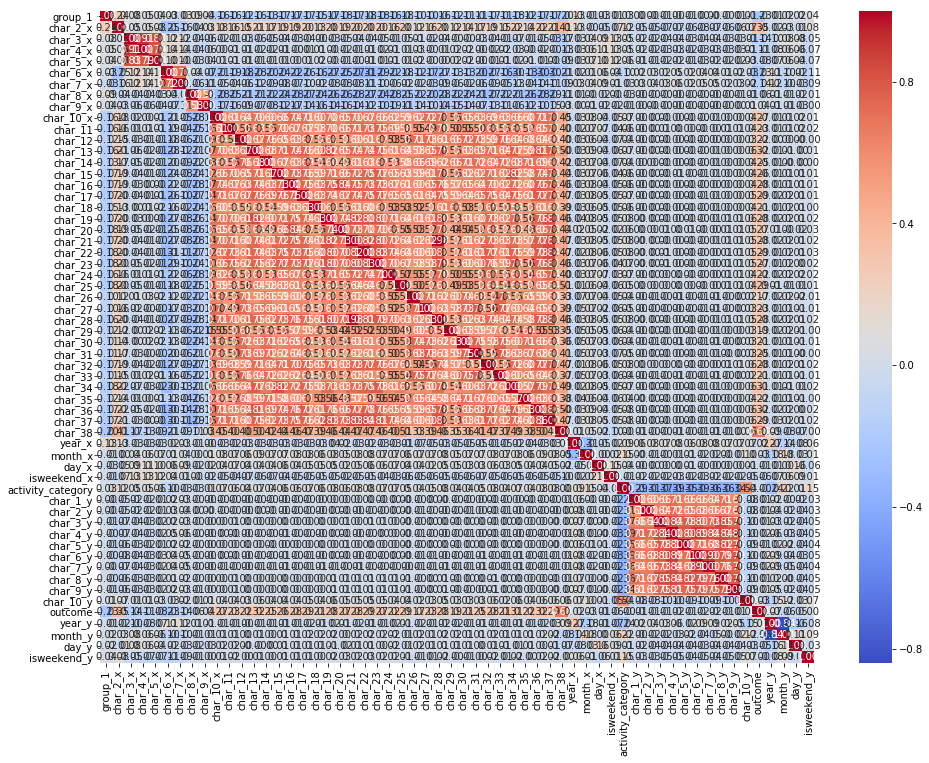

In [331]:
plt.figure(figsize=(16,12))
sns.heatmap(data=merge_ds.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

As we can see no null values are left in the merge_ds dataset.

Splitting the data into test and train so as to create model based on this dataset and to view he shape of the train and test data.

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
print(Y.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(2197291,)
(2197291, 59)
(1757832, 59)
(439459, 59)
(439459,)
(1757832,)


In [46]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [47]:
import xgboost as xgb
from xgboost import XGBClassifier

In [51]:
# include 'char_6_y'
merge_train=merge_train.drop(['char_4_x','char_36','char_37','char_4_y','char_1_x','char_2_x','char_3_x','char_21','char_28'], axis=1)

In [52]:
merge_train.columns

Index(['people_id', 'group_1', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x',
       'char_9_x', 'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14',
       'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34',
       'char_35', 'char_38', 'year_x', 'month_x', 'day_x', 'isweekend_x',
       'activity_category', 'char_1_y', 'char_2_y', 'char_3_y', 'char_5_y',
       'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'outcome',
       'year_y', 'month_y', 'day_y', 'isweekend_y'],
      dtype='object')

In [53]:
merge_train=merge_train.drop('char_6_y', axis=1)

In [54]:
merge_train.head()

people_id  group_1  char_5_x  char_6_x  char_7_x  char_8_x  char_9_x  \
0        100    17304         5         3        11         2         2   
1        100    17304         5         3        11         2         2   
2        100    17304         5         3        11         2         2   
3        100    17304         5         3        11         2         2   
4        100    17304         5         3        11         2         2   

   char_10_x  char_11  char_12  char_13  char_14  char_15  char_16  char_17  \
0          1        0        0        1        1        0        1        0   
1          1        0        0        1        1        0        1        0   
2          1        0        0        1        1        0        1        0   
3          1        0        0        1        1        0        1        0   
4          1        0        0        1        1        0        1        0   

   char_18  char_19  char_20  char_22  char_23  char_24  char_25  char_26  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   char_27  char_29  char_30  char_31  char_32  char_33  char_34  char_35  \
0        1        0        1        1        0        0        1        1   
1        1        0        1        1        0        0        1        1   
2        1        0        1        1        0        0        1        1   
3        1        0        1        1        0        0        1        1   
4        1        0        1        1        0        0        1        1   

   char_38  year_x  month_x  day_x  isweekend_x  activity_category  char_1_y  \
0       36    2021        6     29            0                4.0       0.0   
1       36    2021        6     29            0                2.0       0.0   
2       36    2021        6     29            0                2.0       0.0   
3       36    2021        6     29            0                2.0       0.0   
4       36    2021        6     29            0                2.0       0.0   

   char_2_y  char_3_y  char_5_y  char_7_y  char_8_y  char_9_y  char_10_y  \
0       0.0       0.0       0.0       0.0       0.0       0.0       76.0   
1       0.0       0.0       0.0       0.0       0.0       0.0        1.0   
2       0.0       0.0       0.0       0.0       0.0       0.0        1.0   
3       0.0       0.0       0.0       0.0       0.0       0.0        1.0   
4       0.0       0.0       0.0       0.0       0.0       0.0        1.0   

   outcome  year_y  month_y  day_y  isweekend_y  
0      0.0  2023.0      8.0   26.0          1.0  
1      0.0  2022.0      9.0   27.0          0.0  
2      0.0  2022.0      9.0   27.0          0.0  
3      0.0  2023.0      8.0    4.0          0.0  
4      0.0  2023.0      8.0   26.0          1.0

# H20

# Why H2O?

H2O contains good default values for many datasets, but to get the best performance for your data you will want to tune at least some of these hyperparameters to maximize the predictive performance of your models. You should start with the most important hyperparameters for your algorithm of choice, for example ntrees and max_depth for the tree models or the hidden layers for Deep Learning.
H2O provides some guidance by grouping the hyperparameters by their importance in the Flow UI. You should look carefully at the values of the ones marked critical, while the secondary or expert ones are generally used for special cases or fine tuning.
Using H2O Auto ML for calculating RMSLE(Root Means Squared Logarithmic Error) between predicted value and actual revenue.  


Connecting to the cluster.

In [230]:
# Connect to a cluster
#port_no=random.randint(5555,55555)
port_no = 54321
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------
H2O cluster uptime:         5 hours 53 mins
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.24.0.1
H2O cluster version age:    25 days
H2O cluster name:           H2O_from_python_chano_ir4idq
H2O cluster total nodes:    1
H2O cluster free memory:    2.072 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  ------------------------------------------

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in merge_train.columns:
    merge_train[col] = labelencoder.fit_transform(merge_train[col])
 
merge_train.head()

people_id  group_1  char_5_x  char_6_x  char_7_x  char_8_x  char_9_x  \
0         38    10857         4         2        10         1         1   
1         38    10857         4         2        10         1         1   
2         38    10857         4         2        10         1         1   
3         38    10857         4         2        10         1         1   
4         38    10857         4         2        10         1         1   

   char_10_x  char_11  char_12  char_13  char_14  char_15  char_16  char_17  \
0          1        0        0        1        1        0        1        0   
1          1        0        0        1        1        0        1        0   
2          1        0        0        1        1        0        1        0   
3          1        0        0        1        1        0        1        0   
4          1        0        0        1        1        0        1        0   

   char_18  char_19  char_20  char_22  char_23  char_24  char_25  char_26  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   char_27  char_29  char_30  char_31  char_32  char_33  char_34  char_35  \
0        1        0        1        1        0        0        1        1   
1        1        0        1        1        0        0        1        1   
2        1        0        1        1        0        0        1        1   
3        1        0        1        1        0        0        1        1   
4        1        0        1        1        0        0        1        1   

   char_38  year_x  month_x  day_x  isweekend_x  activity_category  char_1_y  \
0       36       1        5     28            0                  3         0   
1       36       1        5     28            0                  1         0   
2       36       1        5     28            0                  1         0   
3       36       1        5     28            0                  1         0   
4       36       1        5     28            0                  1         0   

   char_2_y  char_3_y  char_5_y  char_7_y  char_8_y  char_9_y  char_10_y  \
0         0         0         0         0         0         0         76   
1         0         0         0         0         0         0          1   
2         0         0         0         0         0         0          1   
3         0         0         0         0         0         0          1   
4         0         0         0         0         0         0          1   

   outcome  year_y  month_y  day_y  isweekend_y  
0        0       1        7     25            1  
1        0       0        8     26            0  
2        0       0        8     26            0  
3        0       1        7      3            0  
4        0       1        7     25            1

In [57]:
merge_train.to_csv('Hyperparameter.csv')

In [58]:
data_dir = os.getcwd()
data_path =  'Hyperparameter.csv'

In [59]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [60]:
train_data = h2o.import_file(path = data_path, destination_frame = "Hyperparameter.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
train_data.show()

C1 people_id group_1 char_5_x char_6_x char_7_x char_8_x char_9_x char_10_x char_11 char_12 char_13 char_14 char_15 char_16 char_17 char_18 char_19 char_20 char_22 char_23 char_24 char_25 char_26 char_27 char_29 char_30 char_31 char_32 char_33 char_34 char_35 char_38 year_x month_x day_x isweekend_x activity_category char_1_y char_2_y char_3_y char_5_y char_7_y char_8_y char_9_y char_10_y outcome year_y month_y day_y isweekend_y 
 
 
 0 38 10857 4 2 10 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 36 1 5 28 0 3 0 0 0 0 0 0 0 76 0 1 7 25 1 
 1 38 10857 4 2 10 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 36 1 5 28 0 1 0 0 0 0 0 0 0 1 0 0 8 26 0 
 2 38 10857 4 2 10 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 36 1 5 28 0 1 0 0 0 0 0 0 0 1 0 0 8 26 0 
 3 38 10857 4 2 10 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 36 1 5 28 0 1 0 0 0 0 0 0 0 1 0 1 7 3 0 
 4 38 10857 4 2 10 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 36 1 5 28 0 1 0 0 0 0 0 0 0 1 0 1 7 25 1 
 5 38 10857 4 2 10 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 36 1 5 28 0 3 0 0 0 0 0 0 0 1658 0 1 7 3 0 
 6 37698 5982 4 2 10 1 3 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 76 1 0 5 0 1 0 0 0 0 0 0 0 1 1 0 10 22 0 
 7 37698 5982 4 2 10 1 3 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 76 1 0 5 0 1 0 0 0 0 0 0 0 1 1 0 10 22 0 
 8 37699 20844 4 1 4 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 99 2 5 9 0 1 0 0 0 0 0 0 0 1 1 1 1 6 0 
 9 37699 20844 4 1 4 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 99 2 5 9 0 1 0 0 0 0 0 0 0 1 1 1 5 27 0

In [62]:
target = 'outcome'

def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'people_id', 'group_1', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x', 'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_38', 'year_x', 'month_x', 'day_x', 'isweekend_x', 'activity_category', 'char_1_y', 'char_2_y', 'char_3_y', 'char_5_y', 'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'year_y', 'month_y', 'day_y', 'isweekend_y']
outcome


# Runing autoML with rub_time = 300

In [231]:
# setup autoML
# min_mem_size=6 
run_time=300
aml2 = H2OAutoML(max_runtime_secs=run_time)

In [232]:
logs_path = os.getcwd()
logfile = 'logs.txt'

In [233]:
model_start_time = time.time()
aml2.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train


AutoML progress: |████████████████████████████████████████████████████████| 100%


In [73]:
# view leaderboard
lb2 = aml2.leaderboard
lb2.head(1000)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GLM_grid_1_AutoML_20190426_003826_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004045_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004626_model_1 0.229603 0.479169 0.229603 0.474273 0.337414

In [74]:
dataframe2 = lb2.as_data_frame()

In [75]:
dataframe2

model_id  mean_residual_deviance  \
0  GLM_grid_1_AutoML_20190426_003826_model_1                0.229603   
1  GLM_grid_1_AutoML_20190426_004045_model_1                0.229603   
2  GLM_grid_1_AutoML_20190426_004626_model_1                0.229603   

       rmse       mse       mae     rmsle  
0  0.479169  0.229603  0.474273  0.337414  
1  0.479169  0.229603  0.474273  0.337414  
2  0.479169  0.229603  0.474273  0.337414

In [76]:
dataframe2.to_json("iteration2_500.json")

In [77]:
dataframe2.to_csv("iteration2_500.csv")

# Running with Runtime = 700

In [78]:
aml3 = H2OAutoML(max_runtime_secs=700)

In [79]:
model_start_time = time.time()
aml3.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [80]:
# view leaderboard
lb3 = aml3.leaderboard
lb3.head(500)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GLM_grid_1_AutoML_20190426_003826_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004045_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004626_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_005513_model_1 0.229603 0.479169 0.229603 0.474273 0.337414

In [109]:
model1 = h2o.get_model(lb3[0,'model_id'])

In [110]:
model1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_003826_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_003826_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 3609679185801637877},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': '

In [111]:
hy_parameter = model1.params
n='hyperparameter_1500.json'
json_to_csv(hy_parameter,n)


In [99]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [101]:
def json_to_csv(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [85]:
dict_to_json(hy_parameter,n)

In [86]:
model2 = h2o.get_model(lb3[1,'model_id'])
model2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_004045_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_004045_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -4509137115612548474},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [105]:
hy_parameter = model2.params
n='hyperparameter_1501.json'

In [107]:
json_to_csv(hy_parameter,n)

In [88]:
model3 = h2o.get_model(lb3[2,'model_id'])
model3.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_004626_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_004626_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -1779343861741756526},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [103]:
hy_parameter = model3.params
n='hyperparameter_1502.json'

In [106]:
json_to_csv(hy_parameter,n)

In [91]:
model4 = h2o.get_model(lb3[3,'model_id'])
model4.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_005513_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_005513_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -4669048110665188500},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [95]:
hy_parameter = model3.params
n='hyperparameter_1503.json'

In [102]:
json_to_csv(hy_parameter,n)

# For Runtime of 1500

In [113]:
aml4 = H2OAutoML(max_runtime_secs=1500)

In [114]:
model_start_time = time.time()
aml4.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [115]:
# view leaderboard
lb4 = aml4.leaderboard
lb4.head(1000)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20190426_023335 0.018054 0.134365 0.018054 0.0703409 0.100466 
 DRF_1_AutoML_20190426_023335 0.0188265 0.13721 0.0188265 0.0627158 0.101164 
 GLM_grid_1_AutoML_20190426_023335_model_1 0.16463 0.405746 0.16463 0.374609 0.285014 
 GLM_grid_1_AutoML_20190426_004626_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_005513_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_003826_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004045_model_1 0.229603 0.479169 0.229603 0.474273 0.337414

In [235]:
model1 = h2o.get_model(lb4[0,'model_id'])

In [236]:
model1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'outcome',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,

In [239]:
hy_parameter = model1.params
n='hy_runtime_1500_A.json'

In [161]:
json_to_csv(hy_parameter,n)

In [162]:
model2 = h2o.get_model(lb4[1,'model_id'])

In [163]:
model2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment':

In [164]:
hy_parameter = model2.params
n='hyperparameter_runtime1500B.json'
json_to_csv(hy_parameter,n)

In [165]:
model2 = h2o.get_model(lb4[1,'model_id'])

In [166]:
model2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment':

In [181]:
hy_parameter = model2.params
n='hy_runtime_1500_2.json'

json_to_csv(hy_parameter,n)

In [168]:
model3 = h2o.get_model(lb4[2,'model_id'])
model3.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_023335_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_023335_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -2294046271881957000},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [180]:

hy_parameter = model3.params
n='hy_runtime_1500_3.json'

json_to_csv(hy_parameter,n)

In [169]:
model4 = h2o.get_model(lb4[3,'model_id'])

model4.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_004626_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_004626_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -1779343861741756526},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [179]:
hy_parameter = model4.params
n='hy_runtime_1500_4.json'

json_to_csv(hy_parameter,n)

In [150]:
model5 = h2o.get_model(lb4[4,'model_id'])

model5.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_005513_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_005513_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -4669048110665188500},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [178]:
hy_parameter = model5.params
n='hy_runtime_1500_5.json'
json_to_csv(hy_parameter,n)

In [172]:
model6 = h2o.get_model(lb4[5,'model_id'])

In [173]:
model6.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_003826_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_003826_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 3609679185801637877},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': '

In [177]:
hy_parameter = model6.params
n='hy_runtime_1500_6.json'

json_to_csv(hy_parameter,n)

In [175]:
model7 = h2o.get_model(lb4[6,'model_id'])

model7.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_004045_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_004045_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -4509137115612548474},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [176]:
hy_parameter = model7.params
n='hy_runtime_1500_7.json'

json_to_csv(hy_parameter,n)

# For RUn time of 1700

In [120]:
aml5 = H2OAutoML(max_runtime_secs=1700)

In [121]:
model_start_time = time.time()
aml5.train(x=X,y=y,training_frame=train_data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [198]:
# view leaderboard
lb5 = aml5.leaderboard
lb5.head(1000)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20190426_023335 0.018054 0.134365 0.018054 0.0703409 0.100466 
 DRF_1_AutoML_20190426_023335 0.0188265 0.13721 0.0188265 0.0627158 0.101164 
 GLM_grid_1_AutoML_20190426_032644_model_1 0.142781 0.377863 0.142781 0.330517 0.265206 
 GLM_grid_1_AutoML_20190426_023335_model_1 0.16463 0.405746 0.16463 0.374609 0.285014 
 GLM_grid_1_AutoML_20190426_004626_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_005513_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_003826_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004045_model_1 0.229603 0.479169 0.229603 0.474273 0.337414

In [182]:

model1 = h2o.get_model(lb5[0,'model_id'])

model1.params


{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'outcome',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,

In [189]:
hy_parameter = model1.params
n='hy_runtime_1700_1.json'

json_to_csv(hy_parameter,n)

In [183]:
model2 = h2o.get_model(lb5[1,'model_id'])

model2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment':

In [190]:
hy_parameter = model2.params
n='hy_runtime_1700_2.json'

json_to_csv(hy_parameter,n)

In [184]:
model3 = h2o.get_model(lb5[2,'model_id'])

model3.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_032644_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_032644_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -5488284573634188191},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [191]:
hy_parameter = model3.params
n='hy_runtime_1700_3.json'

json_to_csv(hy_parameter,n)

In [185]:
model4 = h2o.get_model(lb5[3,'model_id'])

model4.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_023335_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_023335_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -2294046271881957000},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [192]:
hy_parameter = model4.params
n='hy_runtime_1700_4.json'

json_to_csv(hy_parameter,n)

In [186]:
model5 = h2o.get_model(lb5[4,'model_id'])

model5.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_004626_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_004626_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -1779343861741756526},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [187]:
model6 = h2o.get_model(lb5[5,'model_id'])

model6.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_005513_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_005513_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -4669048110665188500},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [193]:
hy_parameter = model6.params
n='hy_runtime_1700_6.json'

json_to_csv(hy_parameter,n)

In [188]:
model7 = h2o.get_model(lb5[6,'model_id'])

model7.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_003826_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_003826_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 3609679185801637877},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': '

In [194]:
hy_parameter = model6.params
n='hy_runtime_1700_6.json'

json_to_csv(hy_parameter,n)

# For runtime of 2000

In [195]:
aml6 = H2OAutoML(max_runtime_secs=2000)

In [196]:
model_start_time = time.time()
aml6.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [199]:
# view leaderboard
lb6 = aml6.leaderboard
lb6.head(1000)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20190426_045022 0.0172515 0.131345 0.0172515 0.0681743 0.0982486 
 DRF_1_AutoML_20190426_045022 0.0180008 0.134167 0.0180008 0.0607534 0.0989772 
 StackedEnsemble_BestOfFamily_AutoML_20190426_023335 0.018054 0.134365 0.018054 0.0703409 0.100466 
 DRF_1_AutoML_20190426_023335 0.0188265 0.13721 0.0188265 0.0627158 0.101164 
 GBM_1_AutoML_20190426_045022 0.0831487 0.288355 0.0831487 0.181747 0.203411 
 GLM_grid_1_AutoML_20190426_045022_model_1 0.128091 0.357898 0.128091 0.282619 0.251989 
 GLM_grid_1_AutoML_20190426_032644_model_1 0.142781 0.377863 0.142781 0.330517 0.265206 
 GLM_grid_1_AutoML_20190426_023335_model_1 0.16463 0.405746 0.16463 0.374609 0.285014 
 GLM_grid_1_AutoML_20190426_004626_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_005513_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_003826_model_1 0.229603 0.479169 0.229603 0.474273 0.337414 
 GLM_grid_1_AutoML_20190426_004045_model_1 0.229603 0.479169 0.229603 0.474273 0.337414

In [200]:
model1 = h2o.get_model(lb6[0,'model_id'])

model1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_045022',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_045022'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'outcome',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,

In [201]:

hy_parameter = model1.params
n='hy_2000_1.json'

json_to_csv(hy_parameter,n)

In [214]:
model2 = h2o.get_model(lb6[1,'model_id'])

model2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190426_045022',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190426_045022'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment':

In [215]:
hy_parameter = model1.params
n='hy_2000_2.json'

json_to_csv(hy_parameter,n)

In [216]:
model2 = h2o.get_model(lb6[1,'model_id'])

model2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190426_045022',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190426_045022'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment':

In [217]:
hy_parameter = model2.params
n='hy_2000_2.json'

json_to_csv(hy_parameter,n)

In [218]:
model3 = h2o.get_model(lb6[2,'model_id'])

model3.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'outcome',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,

In [219]:
hy_parameter = model3.params
n='hy_2000_3.json'

json_to_csv(hy_parameter,n)

In [220]:

model4 = h2o.get_model(lb6[3,'model_id'])

model4.params


{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190426_023335',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190426_023335'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment':

In [221]:
hy_parameter = model4.params
n='hy_2000_4.json'

json_to_csv(hy_parameter,n)

In [222]:
model5 = h2o.get_model(lb6[4,'model_id'])

model5.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_20190426_045022',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_20190426_045022'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment':

In [223]:

hy_parameter = model5.params
n='hy_2000_5.json'

json_to_csv(hy_parameter,n)

In [224]:

model6 = h2o.get_model(lb6[5,'model_id'])

model6.params



{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_045022_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_045022_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 1254189325192682902},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': '

In [225]:
hy_parameter = model6.params
n='hy_2000_6.json'

json_to_csv(hy_parameter,n)

In [226]:
model7 = h2o.get_model(lb6[6,'model_id'])

model7.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_032644_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_032644_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -5488284573634188191},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [227]:
hy_parameter = model7.params
n='hy_2000_7.json'

json_to_csv(hy_parameter,n)

In [240]:
model8 = h2o.get_model(lb6[7,'model_id'])

model8.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_023335_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_023335_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -2294046271881957000},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [241]:
hy_parameter = model8.params
n='hy_2000_8.json'

json_to_csv(hy_parameter,n)

In [242]:
model9 = h2o.get_model(lb6[8,'model_id'])

model9.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_004626_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_004626_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -1779343861741756526},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [243]:
hy_parameter = model9.params
n='hy_2000_9.json'

json_to_csv(hy_parameter,n)

In [244]:
model10 = h2o.get_model(lb6[9,'model_id'])

model10.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_005513_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_005513_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': -4669048110665188500},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 

In [245]:
hy_parameter = model10.params
n='hy_2000_10.json'

json_to_csv(hy_parameter,n)

In [246]:
model11 = h2o.get_model(lb6[10,'model_id'])

model11.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_grid_1_AutoML_20190426_003826_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_grid_1_AutoML_20190426_003826_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Hyperparameter.csv',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Hyperparameter.csv'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'seed': {'default': -1, 'actual': 3609679185801637877},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': '

In [247]:
hy_parameter = model11.params
n='hy_2000_11.json'

json_to_csv(hy_parameter,n)

# Hyperparameter tuning using GridSearchCV on H2O

### GridSearch CV

Some models allow for specialized, efficient parameter search strategies.One such approach is GridSearchCV that exhaustively considers all parameter combinations.The GridSearch instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

Grid search is a very traditional technique for implementing hyperparameters. It brute force all combinations. Grid search requires to create two set of hyperparameters.

1.Learning Rate<br/>
2.Number of Layers<br/>
Grid search trains the algorithm for all combinations by using the two set of hyperparameters (learning rate and number of layers) and measures the performance using “Cross Validation” technique. This validation technique gives assurance that our trained model got most of the patterns from the dataset. One of the best methods to do validation by using “K-Fold Cross Validation” which helps to provide ample data for training the model and ample data for validations.



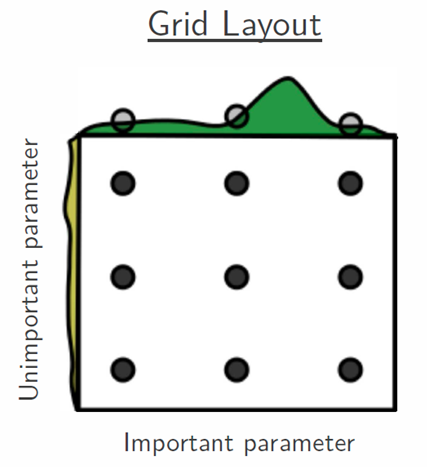

In [312]:
Image("GRid search.png")

The Grid search method is a simpler algorithm to use but it suffers if data have high dimensional space called the curse of dimensionality.

### Models for which we are performing grid search are 
1. GLM (Generalized linear model)
2. GBM(Gradient Boosting Machine)
3. DRF(Distributed Random forest)

For picking up the best hyperparameters for any model below link for grid serach can be referred : https://h2o-release.s3.amazonaws.com/h2o/rel-wright/9/docs-website/h2o-docs/grid-search.html

In [248]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [262]:
merge_train.to_csv('test.csv')
#X = merge_train.columns
#Y = merge_train['outcome']
#print(X)

In [265]:
data = h2o.import_file("test.csv")
test = h2o.import_file("valid.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [324]:
# Identify predictors and response
x = data.columns
y = "outcome"
x.remove(y)

# For binary classification, response should be a factor
data[y] = data[y].asfactor()
test[y] = test[y].asfactor()

# Split data into train & validation
ss = data.split_frame(seed = 1)
train = ss[0]
valid = ss[1]


## Generalized Linear Model

Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. Each serves a different purpose, and depending on distribution and link function choice, can be used either for prediction or classification.
The Generalized Linear Model personality of the Fit Model platform enables you to fit generalized linear models for responses with binomial, normal, Poisson, or exponential distributions.

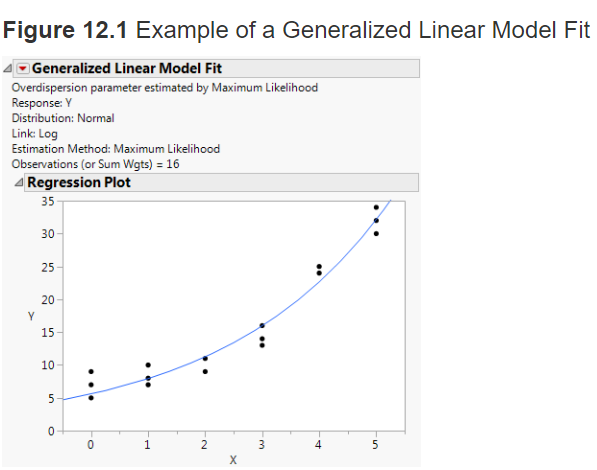

In [313]:
Image("GLM.png")

Below are the important hyperparameters:<br/>
1. seed: Specify the random number generator (RNG) seed for algorithm components dependent on randomization. The seed is consistent for each H2O instance so that you can create models with the same starting conditions in alternative configurations.<br/>
2. tweedie_variance_power: (Only applicable if Tweedie is specified for Family) Specify the Tweedie variance power.<br/>

3. tweedie_link_power: (Only applicable if Tweedie is specified for Family) Specify the Tweedie link power.<br/>

4. theta: Theta value (equal to 1/r) for use with the negative binomial family. This value must be > 0 and defaults to 1e-10.<br/>
5. alpha: Specify the regularization distribution between L1 and L2.<br/>

6. lambda: Specify the regularization strength.<br/>
7. missing_values_handling: Specify how to handle missing values (Skip or MeanImputation).<br/>
8. standardize: Specify whether to standardize the numeric columns to have a mean of zero and unit variance. Standardization is highly recommended; if you do not use standardization, the results can include components that are dominated by variables that appear to have larger variances relative to other attributes as a matter of scale, rather than true contribution. This option is enabled by default.


In [282]:
# GLM hyperparameters
glm_params1 = {'tweedie_variance_power': [0],
                'tweedie_link_power': [1],
                'alpha': [0.0,0.2,0.4,0.6,0.8,1.0],
              'lambda':[1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0],
               'missing_values_handling' : "MeanImputation"

               
}

In [285]:
#Train and validate a cartesian grid of GlMs
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
aa = H2OGeneralizedLinearEstimator(family = 'binomial')
glm_grid1 = H2OGridSearch(model=aa,
                          search_criteria = {'strategy': "Cartesian"},
                          hyper_params=glm_params1)

In [286]:
glm_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid
               )

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [287]:
# sort the grid models by decreasing AUC
grid_table = glm_grid1.get_grid(sort_by = 'auc', decreasing = True)
print(grid_table)

      alpha    lambda missing_values_handling tweedie_link_power  \
0     [0.0]    [0.01]          MeanImputation                1.0   
1     [0.0]   [0.001]          MeanImputation                1.0   
2     [0.0]     [0.0]          MeanImputation                1.0   
3     [0.4]     [0.0]          MeanImputation                1.0   
4     [1.0]     [0.0]          MeanImputation                1.0   
5     [0.6]     [0.0]          MeanImputation                1.0   
6     [0.8]     [0.0]          MeanImputation                1.0   
7     [0.2]     [0.0]          MeanImputation                1.0   
8     [0.4]  [1.0E-5]          MeanImputation                1.0   
9     [0.0]  [1.0E-4]          MeanImputation                1.0   
10    [0.2]   [0.001]          MeanImputation                1.0   
11    [0.2]  [1.0E-4]          MeanImputation                1.0   
12    [0.2]  [1.0E-5]          MeanImputation                1.0   
13    [1.0]  [1.0E-5]          MeanImputation   

47                 0.5  



In [288]:
# Grab the top GBM model, chosen by validation AUC
best_glm1 = grid_table.models[0]

In [ ]:
 #Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
#best_glm_perf1 = best_glm1.model_performance(test)
print(best_glm1.actual_params)

# Gradient Boosting Machine

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. The guiding heuristic is that good predictive results can be obtained through increasingly refined approximations. H2O’s GBM sequentially builds regression trees on all the features of the dataset in a fully distributed way - each tree is built in parallel.


Whereas random forests build an ensemble of deep independent trees, GBMs build an ensemble of shallow and weak successive trees with each tree learning and improving on the previous. When combined, these many weak successive trees produce a powerful “committee” that are often hard to beat with other algorithms. This tutorial will cover the fundamentals of GBMs for regression problems.

###### Boosted regression tree predictions 

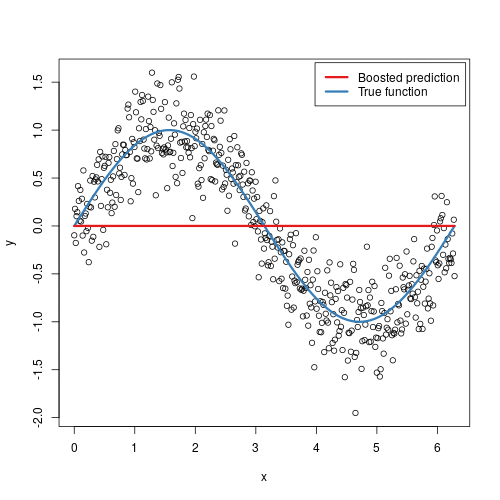

In [314]:
Image("boosted_stumps (1).gif")

### Most effective Hyperparameters for GBM :


1.seed: Specify the random number generator (RNG) seed for algorithm components dependent on randomization. The seed is consistent for each H2O instance so that you can create models with the same starting conditions in alternative configurations.<br/>
2.learn_rate: Specify the learning rate. The range is 0.0 to 1.0.<br/>
3.learn_rate_annealing: Specifies to reduce the learn_rate by this factor after every tree. So for N trees, GBM starts with learn_rate and ends with learn_rate * learn_rate_annealing**^*N*. For example, instead of using **learn_rate=0.01, you can now try learn_rate=0.05 and learn_rate_annealing=0.99. This method would converge much faster with almost the same accuracy. Use caution not to overfit.<br/>
5.max_abs_leafnode_pred: When building a GBM classification model, this option reduces overfitting by limiting the maximum absolute value of a leaf node prediction. This option defaults to Double.MAX_VALUE.<br/>
6.distribution: Specify the distribution (i.e., the loss function). The options are AUTO, bernoulli, multinomial, gaussian, poisson, gamma, laplace, quantile, huber, or tweedie.<br/>
7.tweedie_power: (Only applicable if Tweedie is specified for distribution) Specify the Tweedie power. The range is from 1 to 2 For a normal distribution, enter 0. For Poisson distribution, enter 1. For a gamma distribution, enter 2. For a compound Poisson-gamma distribution, enter a value greater than 1 but less than 2. For more information, refer to Tweedie distribution.<br/>
8.huber_alpha: Specify the desired quantile for Huber/M-regression (the threshold between quadratic and linear loss). This value must be between 0 and 1.<br/>
9.quantile_alpha: (Only applicable if Quantile is specified for distribution) Specify the quantile to be used for Quantile Regression.<br/>

In [325]:
# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)




In [326]:
gbm_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)



gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [329]:
# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
print(gbm_gridperf1)

# Grab the top GBM model, chosen by validation AUC
best_gbm1 = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
t = test.columns
t = t.remove(y)
best_gbm_perf1 = best_gbm1.model_performance(t)
best_gbm_perf1.auc() 

      col_sample_rate learn_rate max_depth sample_rate           model_ids  \
0                 1.0        0.1         9         1.0  gbm_grid1_model_72   
1                 1.0        0.1         9         1.0  gbm_grid1_model_36   
2                 0.5        0.1         9         0.8  gbm_grid1_model_17   
3                 0.5        0.1         9         0.8  gbm_grid1_model_53   
4                 0.5        0.1         9         1.0  gbm_grid1_model_35   
5                 0.5        0.1         9         1.0  gbm_grid1_model_71   
6                 1.0        0.1         9         0.8  gbm_grid1_model_54   
7                 1.0        0.1         9         0.8  gbm_grid1_model_18   
8                 0.2        0.1         9         1.0  gbm_grid1_model_34   
9                 0.2        0.1         9         1.0  gbm_grid1_model_70   
10                0.2        0.1         9         0.8  gbm_grid1_model_16   
11                0.2        0.1         9         0.8  gbm_grid

0.990838777429094

# Distributed Random Forest

Distributed Random Forest (DRF) is a powerful classification and regression tool. When given a set of data, DRF generates a forest of classification or regression trees, rather than a single classification or regression tree. Each of these trees is a weak learner built on a subset of rows and columns. More trees will reduce the variance. Both classification and regression take the average prediction over all of their trees to make a final prediction, whether predicting for a class or numeric value. (Note: For a categorical response column, DRF maps factors (e.g. ‘dog’, ‘cat’, ‘mouse) in lexicographic order to a name lookup array with integer indices (e.g. ‘cat -> 0, ‘dog’ -> 1, ‘mouse’ -> 2.)

#### Most effective hyperparameters for DRF:

1. mtries: Specify the columns to randomly select at each level. If the default value of -1 is used, the number of variables is the square root of the number of columns for classification and p/3 for regression (where p is the number of predictors). The range is -1 to >=1.<br/>
2. categorical_encoding: Specify one of the following encoding schemes for handling categorical features:<br/>
auto or AUTO: Allow the algorithm to decide (default). In DRF, the algorithm will automatically perform enum encoding.<br/>
enum or Enum: 1 column per categorical feature<br/>
enum_limited or EnumLimited: Automatically reduce categorical levels to the most prevalent ones during Aggregator training and only keep the T (1024) most frequent levels.<br/>
one_hot_explicit or OneHotExplicit: N+1 new columns for categorical features with N levels<br/>
binary or Binary: No more than 32 columns per categorical feature<br/>
eigen or Eigen: k columns per categorical feature, keeping projections of one-hot-encoded matrix onto k-dim eigen space only<br/>
label_encoder or LabelEncoder: Convert every enum into the integer of its index (for example, level 0 -> 0, level 1 -> 1, etc.)<br/>
sort_by_response or SortByResponse: Reorders the levels by the mean response (for example, the level with lowest response -> 0, the level with second-lowest response -> 1, etc.). This is useful in GBM/DRF, for example, when you have more levels than nbins_cats, and where the top level splits now have a chance at separating the data with a split. Note that this requires a specified response column.<br/>

In [317]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [297]:
covtype = h2o.import_file("test1.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [299]:
# convert response column to a factor
covtype[49] = covtype[49].asfactor()

In [300]:
# set the predictor names and the response column name
predictors = covtype.columns[0:49]
response = 'outcome'

In [301]:

# split into train and validation sets
train, valid = covtype.split_frame(ratios = [.8], seed = 1234)

In [302]:
# try using the `mtries` parameter:
cov_drf = H2ORandomForestEstimator(mtries = 30, seed = 1234)
cov_drf.train(x = predictors, y = response, training_frame = train, validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [303]:
print('logloss', cov_drf.logloss(valid = True))

# grid over `mtries` parameter:
# import Grid Search
from h2o.grid.grid_search import H2OGridSearch


logloss 0.0588536280785223


In [318]:
# select the values for `mtries` to grid over
hyper_params = {'mtries': [10,30,40]}

# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}
# initialize the drf estimator
cov_drf_2 = H2ORandomForestEstimator(seed = 1234)

# build grid search with previously made DRF and hyperparameters
grid = H2OGridSearch(model = cov_drf_2, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

# train using the grid
grid.train(x = predictors, y = response, training_frame = train, validation_frame = valid)


drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [330]:
# sort the grid models by logloss
sorted_grid = grid.get_grid(sort_by='auc', decreasing=False)
print(sorted_grid)

    mtries                                                        model_ids  \
0       10  Grid_DRF_py_74_sid_8fb8_model_python_1556253277355_1529_model_1   
1       40  Grid_DRF_py_74_sid_8fb8_model_python_1556253277355_1529_model_3   
2       30  Grid_DRF_py_74_sid_8fb8_model_python_1556253277355_1529_model_2   

                  auc  
0  0.9988937432083326  
1  0.9990794315582037  
2  0.9992773537348923  



# Conclusion:

By trying out the best hyperparameters using H2O and grid search on multiple models like GBM, GLM and RFB.WE can see that the third model i.e. RFB shows the best AUC curve with 0.9988.

## Contributions:

By own : 50% By external sources : 50%

## Citation:

The dataset was from the Kernel on Kagglehttps:https://www.kaggle.com/c/predicting-red-hat-business-value/ and Data was taken from from this.(link given) All these data sets are made up of data from the US government.

https://en.wikipedia.org/wiki/Logistic_regression
https://pandas.pydata.org/pandas-docs/stable/
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86
https://www.geeksforgeeks.org/python-for-data-science/
https://en.wikipedia.org/wiki/Logistic_regression
https://mode.com/python-tutorial/pandas-dataframe/
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
https://www.statisticssolutions.com/assumptions-of-linear-regression/
https://stackoverflow.com/questions/38291118/name-ridge-is-not-defined-in-python-spyder/38291226
http://statisticsbyjim.com/regression/interaction-effects/
https://www.youtube.com/watch?v=DuwrMrPpPMw
https://www.youtube.com/watch?v=yzLpvidTgJg
https://www.youtube.com/watch?v=UGMOSBlaRDs&t=556s

## License

( https://opensource.org/licenses/MIT) Copyright <2019> SHUBHANGI CHANORE Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.